# Instructions:
1. You have sixty (60) minutes to finish the exam.
2. Please avoid using hard coded methods to clean the data. Use vectorized methods as much as possible.
3. Design (color, size, labels, etc) of the graph does not really matter unless otherwise specified. 
4. I am encouraging you to use Google Search to look for documentation on the different functions. You may also use existing queries within public fora such as StackOverflow. 

##### Specific Instructions
1. The books in order of appearance are: ["GoT", "CoK", "SoS", "FfC", "DwD"]
2. Death Year with NaN values are characters who are alive by the end of the 5th book.

# Question Dump:

### Data Cleaning
1. Allegiances: Remove all the "House" strings (ie., "House Targaryen" to "Targaryen"; "House Tully" to "Tully"; and so on) **[7pts]**
2. Change the Gender from 1 or 0 to Male or Female (1 is Male; 0 is Female) **[3pts]**
3. Change the Nobility from 1 or 0 to Noble or Commoner (1 is Noble and 0 is Commoner) **[3pts]**  
4. Create a column called "Frequent Char" where it will contain the values 1 or 0 if the character appears in more than 3 books <br>*(you may create a scratch column if you need)*. **[7pts]**

***Hint: You may use the .apply() function paired with lambda functions for this part.***

### Univariate Analysis
1. How big are each of the different allegiances? Create a bar chart for this. <br> *(Make sure the axis labels are readable --> can make the axis labels vertical or diagonal)* **[10pts]**
2. What year saw the most character deaths? Create a bar chart for this. *(Make sure the x-axis labels are only contain the years present in the Death Year column)* **[10pts]**
3. Create a pie chart to show the percentage distribution of Male and Female characters. **[5pts]**
4. Create a pie chart to show the percentage distribution of Noble characters. **[5pts]**

### Multivariate Analysis
1. What's the average chapter where characters were introduced, for each Allegiance? Create a bar chart for this. **[10pts]**
2. How many frequent AND noble characters are there in every Allegiance? (Has to be both frequent and noble) Create a bar chart for this. **[10pts]**
3. How many noble characters from each Allegiance die per year? (Has to be both frequent and noble) **[10pts]**
4. Create a stacked bar chart for the frequency of Alive and Dead characters, based on their Allegiance. **[20pts]**

***

# Data Loading

In [51]:
# code here
import pandas as pd
df = pd.read_csv('character-deaths.csv')

df.head(5)


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


# Data Cleaning

In [52]:
# code here 1
df['Allegiances'] = df['Allegiances'].str.replace('House ', '').str.strip()



In [53]:
# code here 2
gender_mapping = {1: 'Male', 0: 'Female'}
df['Gender'] = df['Gender'].replace(gender_mapping)
df.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,1,0,0,1,0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,1,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,1,1,1,1,0,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,0,0,0,1,0,0


In [54]:
# code here 3
nobility_mapping = {1: 'Noble', 0: 'Commoner'}
df['Nobility'] = df['Nobility'].replace(nobility_mapping)
df.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,Noble,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,Noble,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,Noble,1,1,1,0,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,Noble,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,Commoner,0,0,1,0,0


In [55]:
# code here 4
df['Appearances'] = df['GoT'] + df['CoK'] + df['SoS'] + df['FfC'] + df['DwD']


In [56]:
df_freq = df.loc[df['Appearances'] > 3]


df.loc[df['Appearances'] > 3, 'Frequent Char'] = "1"
df.loc[df['Appearances'] <= 3, 'Frequent Char'] = "0"
df.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Appearances,Frequent Char
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0,4,1
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0,1,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1,1,0
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1,1,0
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0,1,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,Noble,0,1,1,0,0,2,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,Noble,1,0,1,1,0,3,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,Noble,1,1,1,0,1,4,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,Noble,0,1,0,1,0,2,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,Commoner,0,0,1,0,0,1,0


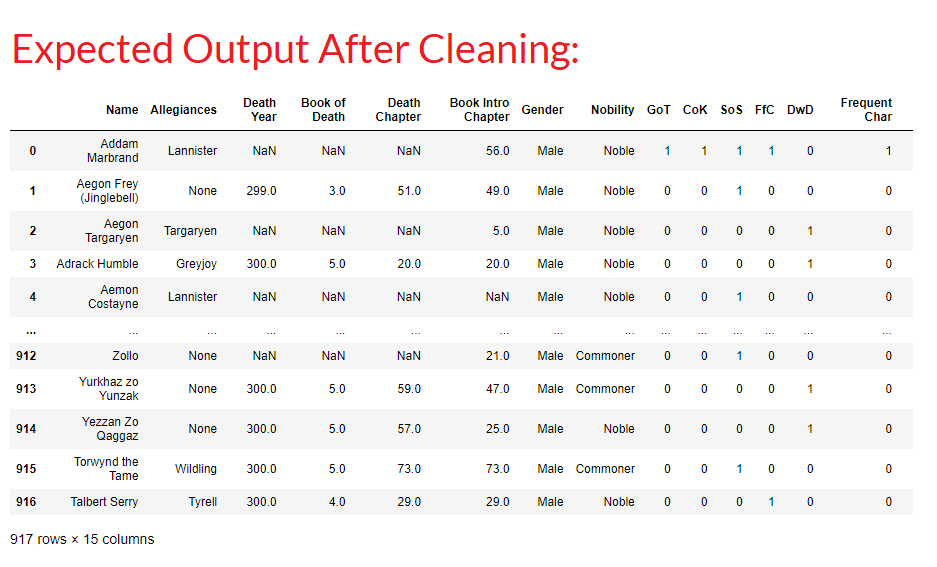

# Univariate Analysis

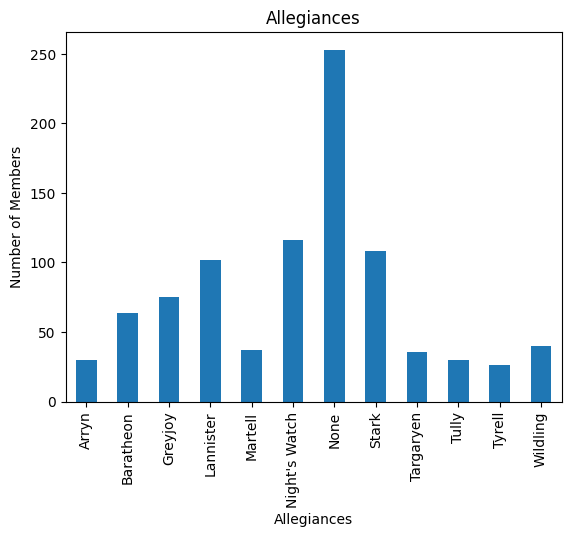

In [69]:
# 1. How big are each of the different allegiances? Create a bar chart for this. 
# (Make sure the axis labels are readable --> can make the axis labels vertical or diagonal) **[10pts]**

import matplotlib as plt
import matplotlib.pyplot as plt

value_counts = df.groupby('Allegiances').size()

value_counts.plot.bar()

plt.xlabel('Allegiances')
plt.ylabel('Number of Members')
plt.title('Allegiances')

plt.show()



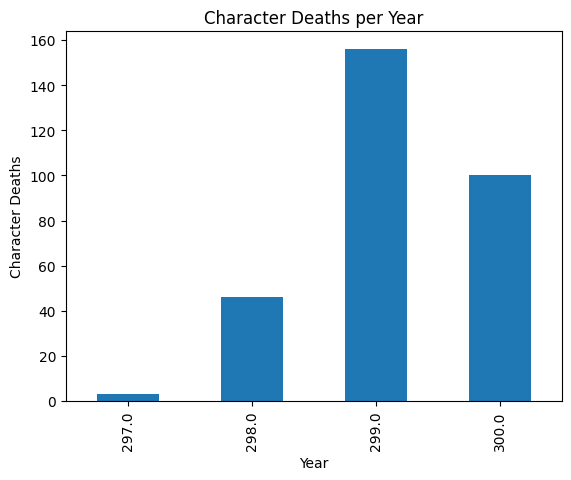

In [58]:
# 2. What year saw the most character deaths? Create a bar chart for this. 
# (Make sure the x-axis labels are only contain the years present in the Death Year column) **[10pts]**

import matplotlib as plt
import matplotlib.pyplot as plt


value_counts = df.groupby('Death Year').size()
value_counts.plot.bar()

plt.xlabel('Year')
plt.ylabel('Character Deaths')
plt.title('Character Deaths per Year')

plt.show()



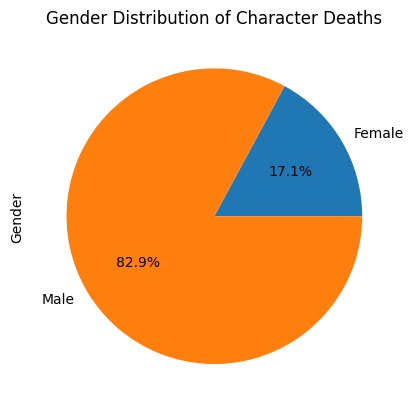

In [68]:
# 3. Create a pie chart to show the percentage distribution of Male and Female characters. **[5pts]**
import matplotlib as plt
import matplotlib.pyplot as plt


value_counts = df.groupby('Gender').size()
value_counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('Gender')
plt.title('Gender Distribution of Character Deaths')

plt.show()




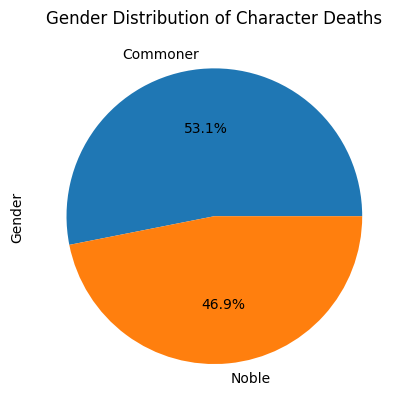

In [91]:
# 4. Create a pie chart to show the percentage distribution of Noble characters. **[5pts]**
import matplotlib as plt
import matplotlib.pyplot as plt


value_counts = df.groupby('Nobility').size()
value_counts.plot.pie(autopct='%1.1f%%')

plt.ylabel('Gender')
plt.title('Gender Distribution of Character Deaths')

plt.show()


# Multivariate Analysis

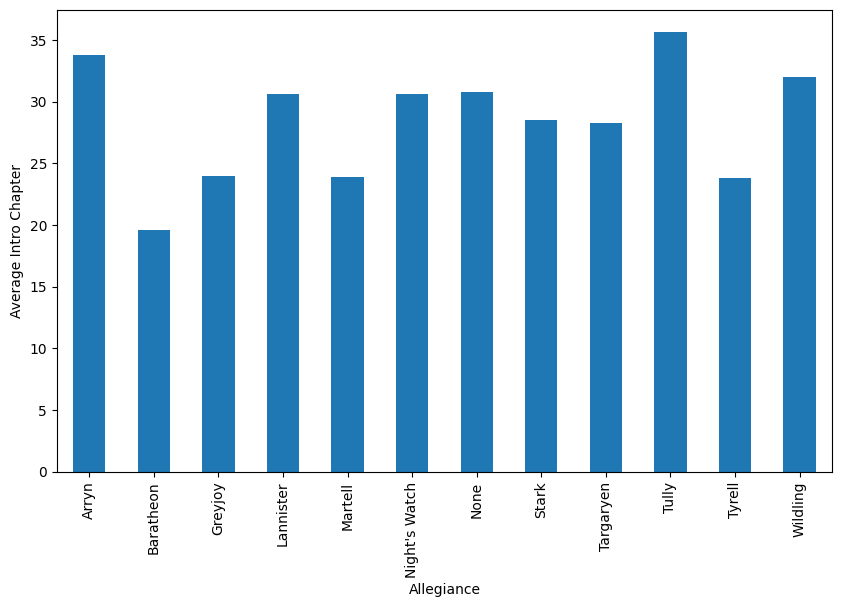

In [113]:
# 1. What's the average chapter where characters were introduced, for each Allegiance? Create a bar chart for this. **[10pts]**
import pandas as pd
import matplotlib.pyplot as plt


intro = df.groupby('Allegiances')['Book Intro Chapter'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
intro.plot(kind='bar')
plt.xlabel('Allegiance')
plt.ylabel('Average Intro Chapter')
plt.show()

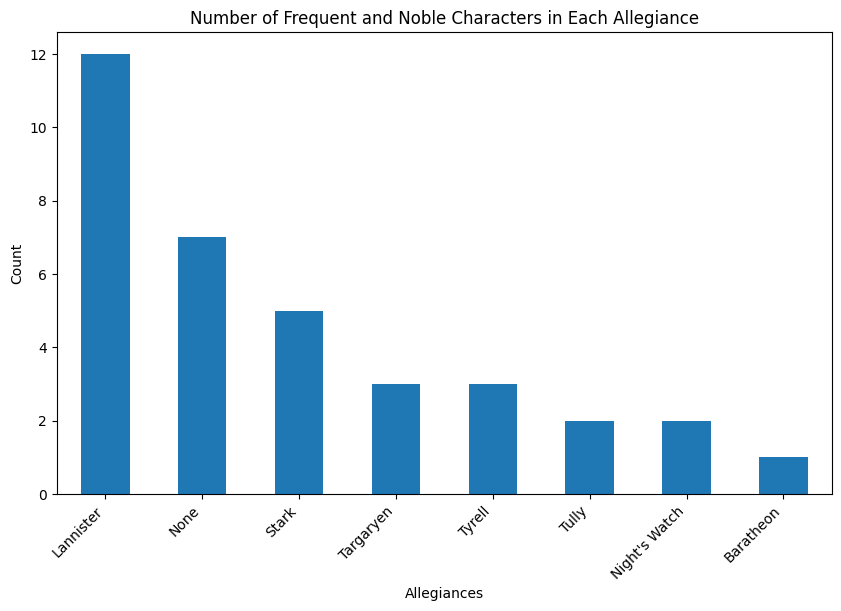

In [117]:
# 2. How many frequent AND noble characters are there in every Allegiance? (Has to be both frequent and noble) 
# Create a bar chart for this. **[10pts]**
filtered = df.loc[(df['Frequent Char']=='1') & (df['Nobility']=='Noble')]

allegiance_counts = filtered['Allegiances'].value_counts()
plt.figure(figsize=(10, 6)) 
allegiance_counts.plot(kind='bar')
plt.title('Number of Frequent and Noble Characters in Each Allegiance')
plt.xlabel('Allegiances')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [136]:
# 3. How many noble characters from each Allegiance die per year? (Has to be both frequent and noble) **[10pts]**



In [142]:
filtered = df.loc[(df['Frequent Char']=='1') & (df['Nobility']=='Noble')]

#allegiance_counts = filtered['Allegiances'].value_counts()
filtered.groupby(['Allegiances', 'Death Year']).size()

#died with no death year?



Allegiances  Death Year
Lannister    300.0         2
None         300.0         3
dtype: int64

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_52638/3076665367.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Status'] = np.where(df_filtered['Death Year'].isnull(), 'Alive', 'Dead')


<Figure size 1000x600 with 0 Axes>

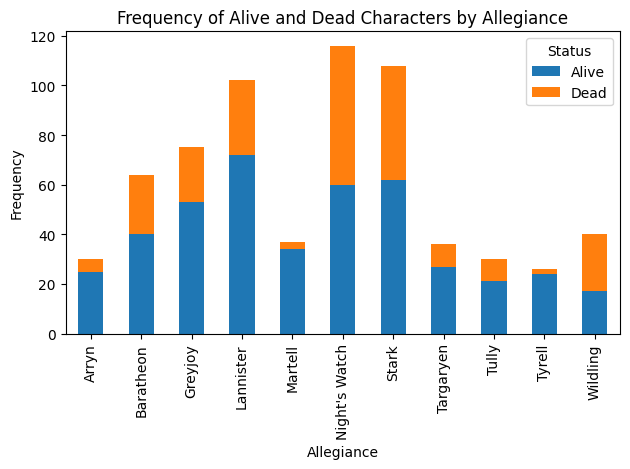

In [107]:
# 4. Create a stacked bar chart for the frequency of Alive and Dead characters, based on their Allegiance. **[20pts]**
import numpy as np

df_filtered = df[df['Allegiances'] != 'None']

df_filtered['Status'] = np.where(df_filtered['Death Year'].isnull(), 'Alive', 'Dead')

grouped_data = df_filtered.groupby(['Allegiances', 'Status']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))  
grouped_data.plot(kind='bar', stacked=True)

plt.title('Frequency of Alive and Dead Characters by Allegiance')
plt.xlabel('Allegiance')
plt.ylabel('Frequency')

plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Bonus

1. Identify the last book where each character appeared in. Display this in a new column called "Final Appearance"


2. "Valar morghulis"

all men must die D: